# P2: Investigate a Dataset (Titanic Survival Analysis)

## What factors made people more likely to survive?

## Introduction

Questions:

What factors made people more likely to survive?
```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

```

In [54]:
%matplotlib inline
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from plotting import *
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import norm

sample_data = pd.read_csv('titanic_data.csv')



## DATA CLEANING

1. Assign values for "Sex" variable for versatile plotting later.
2. Removed from the dataset rows that "Age" has NA
3. Split the sample_data into two separate dataset (two groups). In the following plots, we will be able to compare between the two dataset and see what are the characteristics of the survivals and dead.

In [55]:
sample_data['SexBinary'] = sample_data['Sex'].map( {'male': 0, 'female': 1} ).astype(int)
del sample_data["Ticket"] ,sample_data["Embarked"]

sample_data.info() # Before Dropping NA

sample_data = sample_data.dropna(subset = ['Age'])

sample_data.info() # After Dropping NA


display(sample_data.head())
print sample_data.shape

survivors1 = sample_data.groupby('Survived').get_group(1)
survivors0 = sample_data.groupby('Survived').get_group(0)
print display(survivors1.head())
print display(survivors0.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
SexBinary      891 non-null int32
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 73.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
Cabin          185 non-n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,SexBinary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,0


(714, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,SexBinary
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,1


None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,SexBinary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,8.0500,NaN,0


None


## PLOTS

## Age

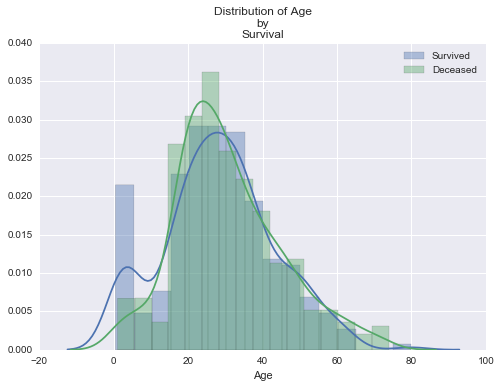

In [97]:
# Age


sns.distplot(sample_data[sample_data.Survived == 1].Age.dropna(), label = 'Survived')
sns.distplot(sample_data[sample_data.Survived == 0].Age.dropna(), label = 'Deceased')
plt.title('Distribution of Age\nby\nSurvival')
plt.legend()


The plots show that the passengers who survived have more younger people than passengers who died. It might be due to the physical abilities of the younger people who are able to survive during the capsize of the ship. It can also be due to older people thinking that the younger people have more years ahead of them.

## Sex

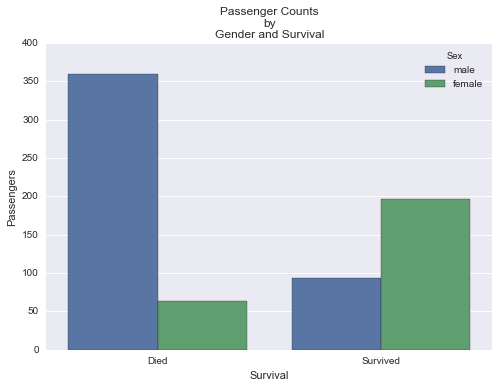

In [4]:
# Sex

sns.countplot(x="Survived",hue="Sex", data=sample_data)
ax = plt.axes()
ax.set_title('Passenger Counts\nby\nGender and Survival')
ax.set(xlabel='Survival', ylabel='Passengers')
ax.set(xticklabels=['Died','Survived'])
plt.show()

It can be shown here in this plot that the survivals are mostly made up of females and males make up most of the dead. It might be chivalry that men chose to sacrifice themselves for the women to survive the tragedy.

## Fare

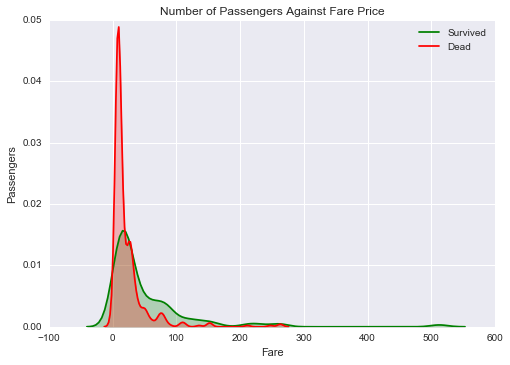

In [56]:
# Fare

sns.kdeplot(survivors1['Fare'], shade=True,color="green", label = 'Survived')
sns.kdeplot(survivors0['Fare'], shade=True, color="red", label = 'Dead')
ax = plt.axes()
ax.set_title('Number of Passengers Against Fare Price')
ax.set(xlabel='Fare', ylabel='Passengers')
plt.show()
#plt.show()

Green plots will be used to represent the survival dataset and red plots will be used to represent the dead. This will be able to give a clear and consistent representation of data in this analysis.

It shown here that majority of both groups are made up of people who paid less than 100. The tickets does not seem to matter if the passenger have paid for tickets costing less than 100, or between 200-300. The only significant observation is for tickets that cost more than that. It can be shown in the plot that there are no dead passengers who paid more than 300 for the fares. This might mean that passengers who paid more than 300 for their tickets have more premium treatment or are already well known rich people that everyone thinks they should be saved.

## Class of the Passengers (Pclass)

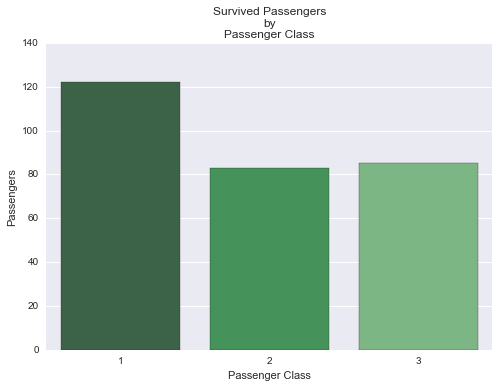

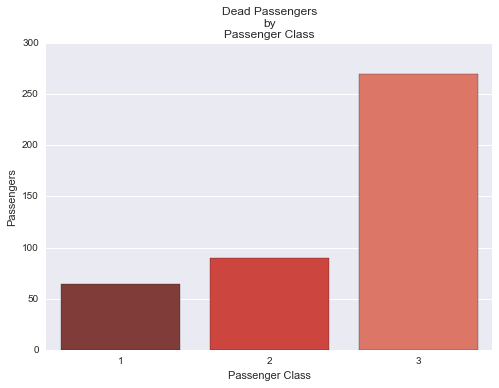

In [9]:
sns.countplot(x="Pclass", data=survivors1, palette="Greens_d");
ax = plt.axes()
ax.set_title('Survived Passengers\nby\nPassenger Class')
ax.set(xlabel='Passenger Class', ylabel='Passengers')
plt.show()
plt.show()

sns.countplot(x="Pclass", data=survivors0, palette="Reds_d");
ax = plt.axes()
ax.set_title('Dead Passengers\nby\nPassenger Class')
ax.set(xlabel='Passenger Class', ylabel='Passengers')
plt.show()



From the plots above, it seems like the passenger class plays a huge part in the survival of the passenger. It can be observed that in chart of survivors, there is more number first class passengers who survived the incident.

In chart of non-survivors, there is more number of third class passengers who did not survive.

There might be a biasness in the ship that the first class passengers should get better treatment than the other class passengers in the ship.

## Siblings and Spouse (SibSp)

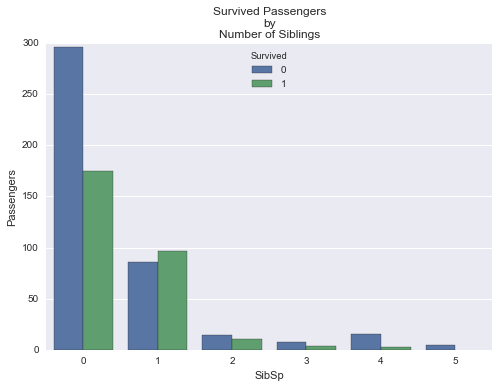

In [57]:
sns.countplot(x="SibSp",hue="Survived", data=sample_data)
ax = plt.axes()
ax.set_title('Survived Passengers\nby\nNumber of Siblings')
ax.set(xlabel='SibSp', ylabel='Passengers')
plt.show()

From the plots above, for those who are not travelling with their siblings or spouse, most end up dead. 

## Parents and Children (Parch)

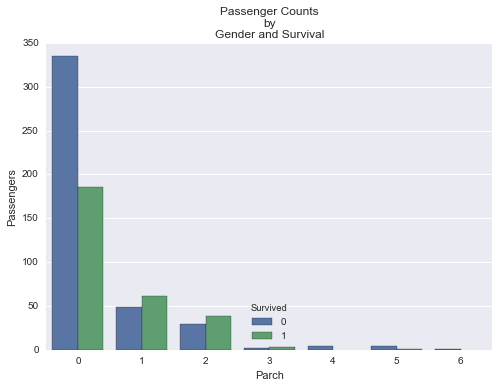

In [48]:
sns.countplot(x="Parch",hue="Survived", data=sample_data)
ax = plt.axes()
ax.set_title('Passenger Counts\nby\nGender and Survival')
ax.set(xlabel='Parch', ylabel='Passengers')
plt.show()

From the plots above, for those who are not travelling with their parents or children, most end up dead. However, this can also be due to the small dataset. This shows similar results as having siblings and spouses.

## Fare and Pclass Multivariate plot

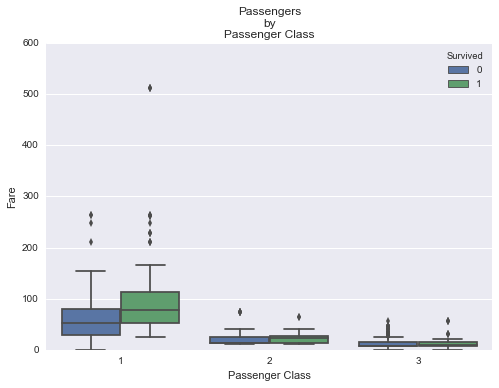

In [20]:
sns.boxplot(x="Pclass", y="Fare", hue='Survived', data=sample_data)
ax = plt.axes()
ax.set_title('Passengers\nby\nPassenger Class')
ax.set(xlabel='Passenger Class', ylabel='Fare')
ax.set(xticklabels=['1','2','3'])
plt.show()

By plotting the Pclass against fare, we can see the fares that the survivors and dead paid and their class. It can be seen in the survivor plot that the survivors who bought ticket at extremely high price is also a 1st class passenger. 

## Conclusion
In conclusion, this simple analysis which has used charts to explore the sample titanic dataset brought out certain features that can be important in categorising survivors in the titanic dataset.

It can be shown that being young, female and paying signifcantly higher fares are the survival profiles. "Women and children first" is a code of conduct where people will let the more vulnerable ones be rescued first. Being rich and social class might also play a part in surviving in this tragedy. It is also shown that those without family on board together with them are likely to die in the tragedy as well compared to those with family members. 